<a href="https://colab.research.google.com/github/roscibely/Financial-analysis/blob/main/Stock_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Candlestick Charts

## Bovespa Stocks Analysis

In [ ]:
!pip install yfinance
!pip install mplfinance

The below code shows how to get data for ITSA4.SA from today to last month and plot the candlestick.

In [133]:
import plotly.graph_objects as go         # To plot the candlestick
import pandas as pd                       # structures and data analysis
import datetime as dt                     # 
import yfinance as yf                     # Yahoo! Finance market data downloader

actual_date = dt.date.today()             # Take the actual date
last_month_date = actual_date-dt.timedelta(days=30) 
actual_date = actual_date.strftime("%Y-%m-%d") 
last_month_date = last_month_date.strftime("%Y-%m-%d")

'''
Stock date ITSA4.SA
https://finance.yahoo.com/quote/ITSA4.SA?p=ITSA4.SA
'''
data = yf.download('ITSA4.SA', last_month_date, actual_date) # Getting data from Yahoo Finance

da= pd.DataFrame(data=data)
da.to_csv('file.csv')
df = pd.read_csv('/content/file.csv')

print(df.head())

[*********************100%***********************]  1 of 1 completed
         Date   Open   High    Low  Close  Adj Close    Volume
0  2021-01-15  11.87  11.94  11.69  11.73  11.707450  17053300
1  2021-01-18  11.75  11.81  11.55  11.63  11.607643  17300200
2  2021-01-19  11.70  11.75  11.34  11.45  11.427989  22949000
3  2021-01-20  11.46  11.50  11.17  11.27  11.248335  23248000
4  2021-01-21  11.30  11.33  11.01  11.04  11.018777  41141600


In [134]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Daily returns

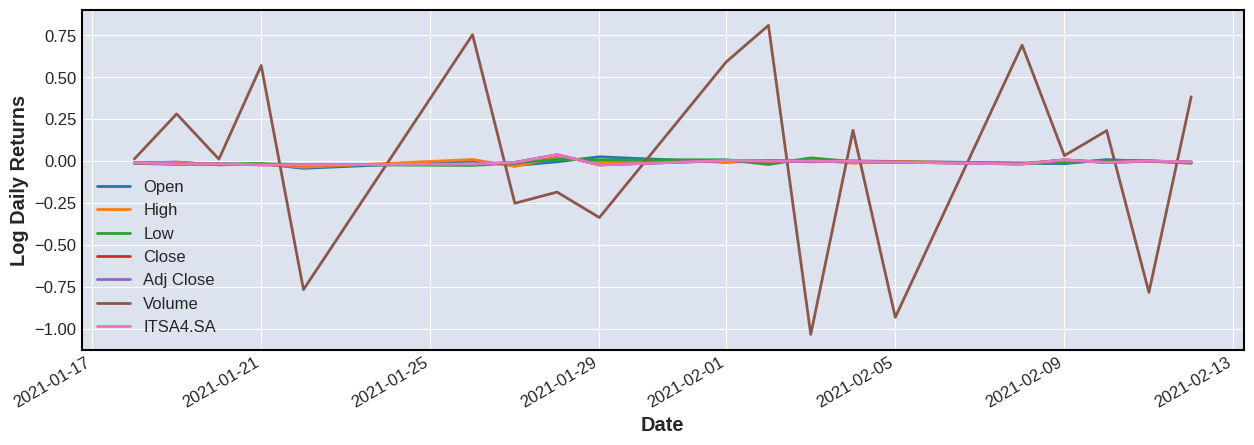

In [135]:
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np

prices=da
prices['ITSA4.SA']=wb.DataReader('ITSA4.SA', data_source='yahoo')['Adj Close']

log_returns=np.log(prices/prices.shift(1))
log_returns.plot(figsize=(15,5))
plt.ylabel('Log Daily Returns')
plt.xlabel('Date')
plt.show()

## Stock and stock index

[*********************100%***********************]  1 of 1 completed


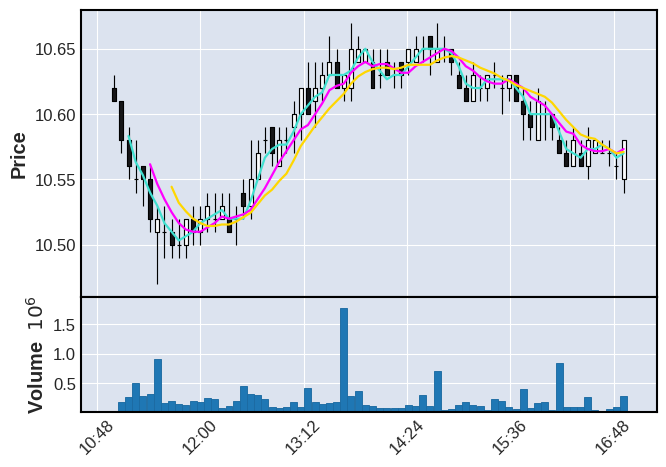

In [116]:
import mplfinance as mpf

data = yf.download(tickers='ITSA4.SA', start=dt.datetime(2021, 2, 12), end=dt.datetime(2021, 2, 13), interval="5m")
mpf.plot(data,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)
